### Identify the frauds using self organizing maps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Credit_Card_Applications.csv')
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [8]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5) 
som.random_weights_init(X)

In [9]:
som.train_random(data=X,num_iteration=100)

In [10]:
from pylab import pcolor,colorbar,plot,show,bone

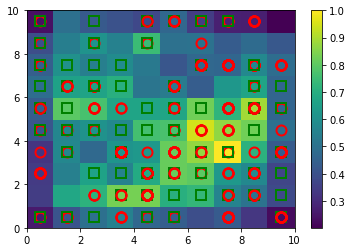

In [11]:
pcolor(som.distance_map().T)
colorbar()
markers= ['o','s']
colors = ['r','g']
for num,row in enumerate(X):
    w = som.winner(row)
    plot(w[0]+0.5,
    w[1]+0.5,
    markers[y[num]],
    markeredgecolor=colors[y[num]],
    markerfacecolor= 'None',
    markersize=10,
    markeredgewidth=2)


In [17]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[7,3],mappings[6,4],mappings[8,5]),axis=0)

In [18]:
frauds = scaler.inverse_transform(frauds)

In [19]:
np.shape(frauds)

(28, 15)

In [20]:
frauds_df = pd.DataFrame(data=frauds)

### Using artificial neural networks to obtain the probability of fraud

Create matrix of features

In [22]:
customers = df.iloc[:,1:].values

Create dependant variable : taking over the output from SOM

In [24]:
is_fraud = np.zeros(len(df))

In [26]:
for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        is_fraud[i]=1

Building and training ANN

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
classifier=Sequential()

In [33]:
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_dim=15))

In [34]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid',input_dim=15))

In [35]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 3s 3ms/step - loss: 0.1625 - accuracy: 0.9594
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.1460 - accuracy: 0.9594


Predicting the probability of fraud

In [38]:
y_pred = classifier.predict(customers)

22/22 [==============================] - 0s 3ms/step


Sorting the probabilities

while concatenating , pay attention to the shape of the vectors

In [39]:
y_pred = np.concatenate((df.iloc[:,0:1],y_pred),axis=1)

In [44]:
predictions = pd.DataFrame(data=y_pred,columns=['customer_id','probability_of_fraud'])

In [50]:
predictions.head().sort_values(['probability_of_fraud'])
predictions.to_csv('fraud_prediction.csv')

Sorting numpy array

In [48]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [49]:
y_pred

array([[1.57684740e+07, 2.60346034e-03],
       [1.55986140e+07, 3.41891823e-03],
       [1.57124830e+07, 3.82665684e-03],
       ...,
       [1.56897860e+07, 2.70874739e-01],
       [1.56472950e+07, 2.74646997e-01],
       [1.55941330e+07, 3.42078269e-01]])